# Image Captioning using Deep Learning [ Training and evaluation is done here]
 [Instructor](https://www.aimplabs.org/about.html): [Prof. Sujoy Biswas](https://github.com/sujoykb)                                                                                      
                                                                                                                            
                                                                                                                            
                                                          by Mahendra Nandi 
* [RKMVERI](http://cs.rkmvu.ac.in/) \
* [BDA Course](http://cs.rkmvu.ac.in/academics-msc-in-big-data-analytics-data-science/)\
[ Github](https://github.com/mahendranandi?tab=repositories)



```
 we have total **9**  py files [text_processing.py ,image_processing.py ,
 encoder_model.py ,visualization.py , model.py , data_loadre.py , train.py ,
  evaluation.py , test.py] and **3** ipynb files [visualization.ipynb , 
  conclusion.ipynb,test.ipynb ]. This is the 2nd ipynb files 
```



In [2]:
## this is to follow how much time is being taken for running a single cell
!pip install ipython-autotime
%load_ext autotime

time: 189 µs (started: 2021-06-30 14:40:32 +00:00)


In [6]:
## mounting google drive to use files already uploaded in drive [ Carefull: the paths are different for you from now , so fix you present directory]
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 8.37 ms (started: 2021-06-30 14:41:31 +00:00)


In [7]:
%cd /content/drive/MyDrive/BDA2020_MN/New_project
# %cd /content/drive/MyDrive/BDA2020_MN/Projects/New_project/utils

/content/drive/MyDrive/BDA2020_MN/New_project
time: 3.69 ms (started: 2021-06-30 14:41:32 +00:00)


In [5]:
%ls

conclusion.ipynb  evaluation.py        output50/      text_processing.py
data/             image_processing.py  pickle_files/  train.py
dataloader.py     model.png            __pycache__/   utils/
encoder_model.py  model.py             test.ipynb     visualization.ipynb
evaluation2.py    output15/            test.py        visualization.py
time: 312 ms (started: 2021-06-30 14:41:24 +00:00)


* (1) ***running text_processing.py just to dump some files using pickle***

In [ ]:

!python text_processing.py

2021-06-29 10:46:42.942591: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
100% 6000/6000 [00:12<00:00, 487.14it/s]
100% 1000/1000 [00:02<00:00, 489.20it/s]
100% 1000/1000 [00:02<00:00, 489.72it/s]
100% 6000/6000 [00:00<00:00, 790657.07it/s]
100% 6000/6000 [00:00<00:00, 68782.76it/s]
100% 6000/6000 [00:00<00:00, 35408.72it/s]
100% 1000/1000 [00:00<00:00, 52167.31it/s]
100% 1000/1000 [00:00<00:00, 36714.52it/s]
time: 25.8 s (started: 2021-06-29 10:46:42 +00:00)


* **(2) running image_processing.py just to dump some files using pickle**

In [ ]:

!python image_processing.py

2021-06-29 10:47:08.610689: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-29 10:47:10.237942: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-29 10:47:10.243872: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-29 10:47:10.244431: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-29 10:47:10.244471: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-29 10:47:10.247197: I tensorflow/stream_executor/platform/default

* **(3) no need to run the encoder_model.py file infact the file need some modefication too**

* **(4) No need to run the dataloader.py file**

* **(5) for visualization we have visualization.py and visualization.ipynb**
 [ go to visualization.ipynb to run the visualization.py file]

* **(6)no need ot run the model.py file ( here i have shown the model with the code for better understanding**

In [ ]:
#importing dependencies
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.recurrent import LSTM
from keras.layers.merge import add
from keras.layers.embeddings import Embedding
#model
max_length=40
vocab_size=6329

input_1=Input(shape=(2048,))
dropout_1=Dropout(0.2)(input_1)
dense_1=Dense(256,activation='relu')(dropout_1)

input_2=Input(shape=(max_length,))
embedding_1=Embedding(vocab_size,256)(input_2)
dropout_2=Dropout(0.2)(embedding_1)
lstm_1=LSTM(256)(dropout_2)

add_1=add([dense_1,lstm_1])
dense_2=Dense(256,activation='relu')(add_1)
dense_3=Dense(vocab_size,activation='softmax')(dense_2)

model=Model(inputs=[input_1,input_2],outputs=dense_3)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 40)]         0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 2048)]       0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 40, 256)      1620224     input_4[0][0]                    
__________________________________________________________________________________________________
dropout_2 (Dropout)             (None, 2048)         0           input_3[0][0]                    
____________________________________________________________________________________________

In [ ]:
# def plot_model(model, to_file='model.png', show_shapes=False, show_dtype=False, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)
# Converts a Keras model to dot format and save to a file.

# Example:

# input = tf.keras.Input(shape=(100,), dtype='int32', name='input')
# x = tf.keras.layers.Embedding(
#     output_dim=512, input_dim=10000, input_length=100)(input)
# x = tf.keras.layers.LSTM(32)(x)
# x = tf.keras.layers.Dense(64, activation='relu')(x)
# x = tf.keras.layers.Dense(64, activation='relu')(x)
# x = tf.keras.layers.Dense(64, activation='relu')(x)
# output = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(x)
# model = tf.keras.Model(inputs=[input], outputs=[output])
# dot_img_file = '/tmp/model_1.png'
# tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)
# Args:
#   model: A Keras model instance
#   to_file: File name of the plot image.
#   show_shapes: whether to display shape information.
#   show_dtype: whether to display layer dtypes.
#   show_layer_names: whether to display layer names.
#   rankdir: rankdir argument passed to PyDot,
#       a string specifying the format of the plot:
# 'TB' creates a vertical plot;
# 'LR' creates a horizontal plot.
#   expand_nested: Whether to expand nested models into clusters.
#   dpi: Dots per inch.

# Returns:
#   A Jupyter notebook Image object if Jupyter is installed.
# This enables in-line display of the model plots in notebooks.



time: 4.61 ms (started: 2021-06-29 11:50:56 +00:00)


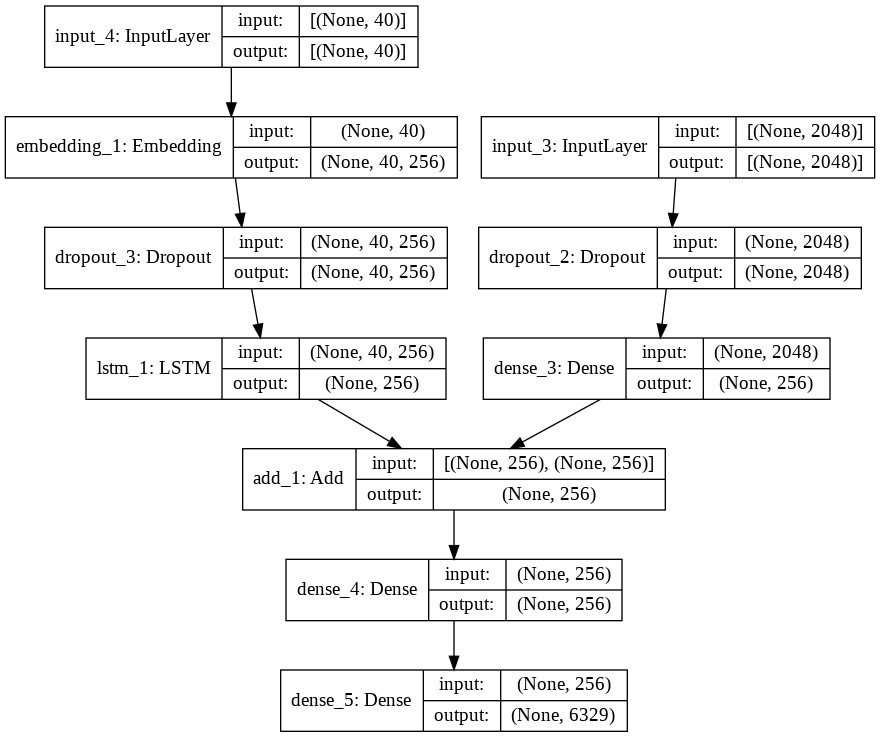

time: 233 ms (started: 2021-06-29 11:50:56 +00:00)


In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True,expand_nested=True)

* ***(7) Now we will train our model and at the same time we save the model weights using model.save() function and we will also dump the losses and the accuracies using pickle( here frist we train the model for 15 epochs then for 50 epochs. As I have noticed overfitting starts after 15 epoch) after the training we see the graph of losss and accuracies for different epochs { Note that we have to put different path for saving those two models (one with 15 epoch trained and another with 50 epochs trained)}***

##3 here I have  mentioned in each cell the epoch no and batch size, but i have seen with others different combinations and showing you some of them. Taking large batch size traing can be completed quickly and also it gives good results, you can see after a very few epochs it almost to saturates, but do more training to get good captions. train till a significant overfitting is not happened. You also find some ridiculas folder name, don't worry the number at the end of a folder is given to seperate 2 distinct training weights, in maximum case but not all cases you will find that if 5060 is written in any folder that means the folder is for that particular training weights when i kept epoch no 50 and batch size 60.

In [ ]:
# traing for 15 epochs
!python train.py -epochs 15 -output_path ./output15/batch60/ -weight_saving_path ./output15/LSTM_Model_Weights60/ -optimal_weight_saving_path ./output15/optimal_weights60/ -train_batch 60 -valid_batch 50

2021-06-29 12:38:28.982623: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-29 12:38:31.118209: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-29 12:38:31.123999: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-29 12:38:31.124556: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-29 12:38:31.124596: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-29 12:38:31.127312: I tensorflow/stream_executor/platform/default

In [ ]:
# traing for ********* 15 epochs batch size is 6 for training ND 1 FOR VALIDATION ********

!python train.py -epochs 15 -output_path ./output15/batch30/ -weight_saving_path ./output15/LSTM_Model_Weights30/ -optimal_weight_saving_path ./output15/optimal_weights30/ -train_batch 6 -valid_batch 1

2021-06-29 13:16:15.928507: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-29 13:16:18.110998: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-29 13:16:18.116738: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-29 13:16:18.117757: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-29 13:16:18.117823: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-29 13:16:18.120634: I tensorflow/stream_executor/platform/default

In [6]:
# training for 50 epochs [ follow the paths are givven different here just to save differently from the previous files]

!python train.py -epochs 50 -output_path ./output50/batch60/ -weight_saving_path ./output50/LSTM_Model_Weights60/ -optimal_weight_saving_path ./output50/optimal_weights60/ -train_batch 60 -valid_batch 50

2021-06-29 21:42:30.283170: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-29 21:42:36.228624: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-29 21:42:36.296453: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-29 21:42:36.297068: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-29 21:42:36.297119: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-29 21:42:36.422788: I tensorflow/stream_executor/platform/default

In [ ]:
# traing for 50 epochs  bathsize is halved
!python train.py -epochs 50 -output_path ./output50/batch30/ -weight_saving_path ./output50/LSTM_Model_Weights30/ -optimal_weight_saving_path ./output50/optimal_weights30/ -train_batch 30 -valid_batch 25

2021-06-29 23:32:43.956985: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-29 23:32:45.919092: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-29 23:32:45.952384: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-29 23:32:45.952960: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-29 23:32:45.953007: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-29 23:32:45.955538: I tensorflow/stream_executor/platform/default

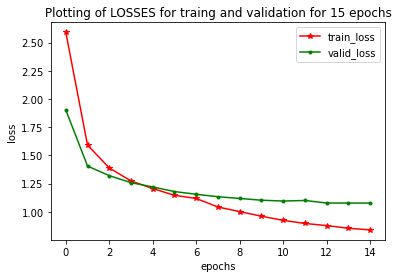

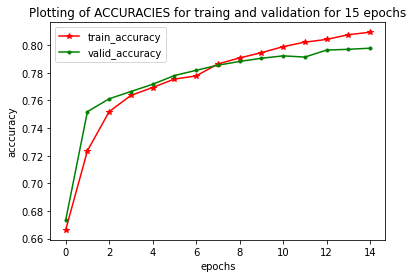

time: 1.89 s (started: 2021-06-30 14:41:43 +00:00)


In [8]:
## showing the plotts for 15 epochs  batch 60,   1560

import pickle
import matplotlib.pyplot as plt

pickle_in= open("output15/batch60/validation_loss_list.pickle","rb")
validation_loss_list1560=pickle.load(pickle_in)
pickle_in= open("output15/batch60/train_loss_list.pickle","rb")
train_loss_list1560=pickle.load(pickle_in)
pickle_in= open("output15/batch60/validation_accuracy_list.pickle","rb")
validation_accuracy_list1560=pickle.load(pickle_in)
pickle_in= open("output15/batch60/train_accuracy_list.pickle","rb")
train_accuracy_list1560=pickle.load(pickle_in)

plt.plot(train_loss_list1560,"r*-",label="train_loss")
plt.plot(validation_loss_list1560,"g.-",label="valid_loss")
plt.legend()
plt.title("Plotting of LOSSES for traing and validation for 15 epochs")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

plt.plot(train_accuracy_list1560,"r*-",label="train_accuracy")
plt.plot(validation_accuracy_list1560,"g.-",label="valid_accuracy")
plt.legend()
plt.title("Plotting of ACCURACIES for traing and validation for 15 epochs")
plt.xlabel("epochs")
plt.ylabel("acccuracy")
plt.show()

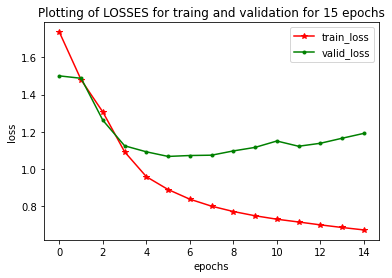

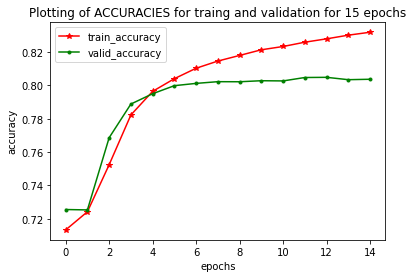

time: 1.84 s (started: 2021-06-30 14:41:49 +00:00)


In [9]:
## showing the plotts for 15 epochs  batch 6 ,      1530

import pickle
import matplotlib.pyplot as plt

pickle_in= open("output15/batch30/validation_loss_list.pickle","rb")
validation_loss_list1530=pickle.load(pickle_in)
pickle_in= open("output15/batch30/train_loss_list.pickle","rb")
train_loss_list1530=pickle.load(pickle_in)
pickle_in= open("output15/batch30/validation_accuracy_list.pickle","rb")
validation_accuracy_list1530=pickle.load(pickle_in)
pickle_in= open("output15/batch30/train_accuracy_list.pickle","rb")
train_accuracy_list1530=pickle.load(pickle_in)

plt.plot(train_loss_list1530,"r*-",label="train_loss")
plt.plot(validation_loss_list1530,"g.-",label="valid_loss")
plt.legend()
plt.title("Plotting of LOSSES for traing and validation for 15 epochs")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

plt.plot(train_accuracy_list1530,"r*-",label="train_accuracy")
plt.plot(validation_accuracy_list1530,"g.-",label="valid_accuracy")
plt.legend()
plt.title("Plotting of ACCURACIES for traing and validation for 15 epochs")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

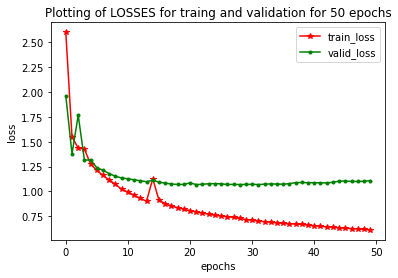

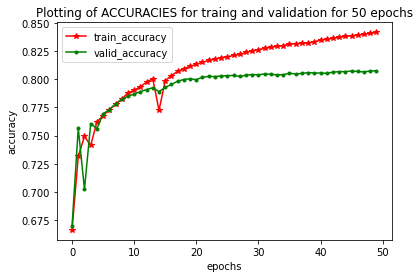

time: 1.88 s (started: 2021-06-30 14:41:57 +00:00)


In [10]:
## showing the plotts for 50 epochs for batch 60,  5060

import pickle
import matplotlib.pyplot as plt

pickle_in= open("output50/batch60/validation_loss_list.pickle","rb")
validation_loss_list5060=pickle.load(pickle_in)
pickle_in= open("output50/batch60/train_loss_list.pickle","rb")
train_loss_list5060=pickle.load(pickle_in)
pickle_in= open("output50/batch60/validation_accuracy_list.pickle","rb")
validation_accuracy_list5060=pickle.load(pickle_in)
pickle_in= open("output50/batch60/train_accuracy_list.pickle","rb")
train_accuracy_list5060=pickle.load(pickle_in)

plt.plot(train_loss_list5060,"r*-",label="train_loss")
plt.plot(validation_loss_list5060,"g.-",label="valid_loss")
plt.legend()
plt.title("Plotting of LOSSES for traing and validation for 50 epochs")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

plt.plot(train_accuracy_list5060,"r*-",label="train_accuracy")
plt.plot(validation_accuracy_list5060,"g.-",label="valid_accuracy")
plt.legend()
plt.title("Plotting of ACCURACIES for traing and validation for 50 epochs")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()



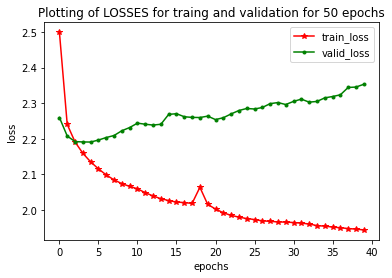

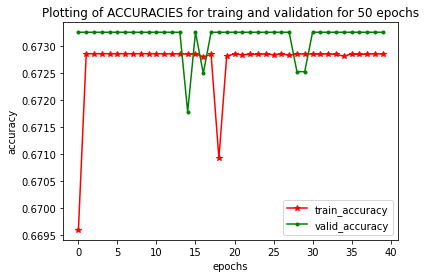

time: 311 ms (started: 2021-06-30 05:20:39 +00:00)


In [8]:
## showing the plotts for 50 epochs for batch 30   5030

import pickle
import matplotlib.pyplot as plt

pickle_in= open("output50/batch30/validation_loss_list.pickle","rb")
validation_loss_list5030=pickle.load(pickle_in)
pickle_in= open("output50/batch30/train_loss_list.pickle","rb")
train_loss_list5030=pickle.load(pickle_in)
pickle_in= open("output50/batch30/validation_accuracy_list.pickle","rb")
validation_accuracy_list5030=pickle.load(pickle_in)
pickle_in= open("output50/batch30/train_accuracy_list.pickle","rb")
train_accuracy_list5030=pickle.load(pickle_in)

plt.plot(train_loss_list5030,"r*-",label="train_loss")
plt.plot(validation_loss_list5030,"g.-",label="valid_loss")
plt.legend()
plt.title("Plotting of LOSSES for traing and validation for 50 epochs")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

plt.plot(train_accuracy_list5030,"r*-",label="train_accuracy")
plt.plot(validation_accuracy_list5030,"g.-",label="valid_accuracy")
plt.legend()
plt.title("Plotting of ACCURACIES for traing and validation for 50 epochs")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()



* ***(8) Now we have trained our model and saw losses , here accuracies no longer mean something great to us . We will use BLEU score for our evaluation We will also analysis critically with Greedy search and Beam search ( beam search with k= 1,2,3,4,5) and see those vBLEU scores in a plot ***

-  starting with model_15 (,i.e, model that was being trained foe 15 epochs     \ 
**greedy search**

In [ ]:
# be careful to follow the below codes, all informations are mentioned though, see for 50 epoch the bleu score is slight greater than that of 15 for greedy search.

## for greedy search (though these will slightly change as many time you will train with same parameters)
##### epoch no------------batch size----------bleu score

##### ---
##### 15 -----------------  60 ---------------- 0.474
##### ---
##### 15 -----------------  6  --------------- 0.478
##### ---
##### 50 -----------------  60 --------------- 0.499        
##### ---
##### 50 ----------------- 30 ----------------- 00
##### ---

#####  for beam search

##### epoch no ------------- bath size --------- K value -------- BLEU score
##### ---
##### 15 ------------------- 60 -----------------1 -------------0.493
##### ---
##### 15 ------------------- 60 -----------------2 -------------0.492
##### ---
##### 15 ------------------- 60 -----------------3 -------------0.494
##### ---
##### 15 ------------------- 60 -----------------4 -------------0.496
##### ---
##### 15 ------------------- 60 -----------------5 -------------0.474



In [ ]:
# for 1560  
!python evaluation.py -weight_loading_path ./output15/LSTM_Model_Weights60/ -evaluation_method "greedy"

2021-06-29 20:30:21.997446: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-29 20:30:24.481287: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-29 20:30:24.508074: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-29 20:30:24.508905: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2021-06-29 20:30:24.508955: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-29 20:30:24.512377: I tensorflow/stream_executor/platform/defa

In [11]:
# for 5060  
!python evaluation.py -weight_loading_path ./output50/LSTM_Model_Weights60/ -evaluation_method "greedy"

2021-06-30 14:53:58.560543: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-30 14:54:02.270650: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-30 14:54:02.334221: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-30 14:54:02.334848: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-30 14:54:02.334890: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-30 14:54:02.463128: I tensorflow/stream_executor/platform/default

In [10]:
# for 1506  batch size was 6 here 
!python evaluation.py -weight_loading_path ./output15/LSTM_Model_Weights30/ -evaluation_method "greedy"

2021-06-30 05:42:02.940165: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-30 05:42:04.992892: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-30 05:42:05.026832: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-30 05:42:05.027453: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-30 05:42:05.027507: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-30 05:42:05.030419: I tensorflow/stream_executor/platform/default

In [12]:
# for 5030 
!python evaluation.py -weight_loading_path ./output50/LSTM_Model_Weights30/ -evaluation_method "greedy"

2021-06-30 15:16:02.171591: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-30 15:16:04.054084: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-30 15:16:04.086397: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-30 15:16:04.086974: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-30 15:16:04.087010: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-30 15:16:04.089593: I tensorflow/stream_executor/platform/default

-  starting with model_15 (,i.e, model that was being trained foe 15 epochs     \ 
**beam search with k=1**

In [ ]:
# for 1560 beam 1     , see beam search with k=1 means greedy search , and the score  same as that
!python evaluation.py -weight_loading_path ./output15/LSTM_Model_Weights60/ -evaluation_method "beam" -k_for_beam_search 1

2021-06-29 20:04:08.696669: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-29 20:04:11.201094: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-29 20:04:11.228423: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-29 20:04:11.229215: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2021-06-29 20:04:11.229261: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-29 20:04:11.232134: I tensorflow/stream_executor/platform/defa

-  starting with model_15 (,i.e, model that was being trained foe 15 epochs     \ 
**beam search with k=2**

In [ ]:
!python evaluation.py -weight_loading_path ./output15/LSTM_Model_Weights60/ -evaluation_method "beam" -k_for_beam_search 2

2021-06-29 19:00:30.207865: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-29 19:00:32.686160: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-29 19:00:32.712947: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-29 19:00:32.713749: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2021-06-29 19:00:32.713798: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-29 19:00:32.716956: I tensorflow/stream_executor/platform/defa

-  starting with model_15 (,i.e, model that was being trained foe 15 epochs     \ 
**beam search with k=3**

In [ ]:
!python evaluation.py -weight_loading_path ./output15/LSTM_Model_Weights60/ -evaluation_method "beam" -k_for_beam_search 3

2021-06-29 17:54:31.539657: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-29 17:54:33.953448: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-29 17:54:33.977294: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-29 17:54:33.978086: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2021-06-29 17:54:33.978166: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-29 17:54:33.980951: I tensorflow/stream_executor/platform/defa

-  starting with model_15 (,i.e, model that was being trained foe 15 epochs     \ 
**beam search with k=4**

In [ ]:
# for 1560 beam 4
!python evaluation.py -weight_loading_path ./output15/LSTM_Model_Weights60/ -evaluation_method "beam" -k_for_beam_search 4

2021-06-29 16:46:02.317777: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-29 16:46:04.844251: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-29 16:46:04.870577: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-29 16:46:04.871418: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2021-06-29 16:46:04.871466: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-29 16:46:04.874591: I tensorflow/stream_executor/platform/defa

-  starting with model_15 (,i.e, model that was being trained foe 15 epochs     \ 
**beam search with k=5**

In [ ]:
# !pip install nltk

  Using cached nltk-3.6.2-py3-none-any.whl (1.5 MB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
     |████████████████████████████████| 720 kB 1.9 MB/s eta 0:00:01
  Using cached click-8.0.1-py3-none-any.whl (97 kB)


In [ ]:
# for 1560  beam 5
!python evaluation.py -weight_loading_path ./output15/LSTM_Model_Weights60/ -evaluation_method "beam" -k_for_beam_search 5

2021-06-29 15:31:06.449964: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-29 15:31:11.108740: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-29 15:31:11.187885: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-29 15:31:11.188946: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2021-06-29 15:31:11.189004: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-29 15:31:11.303339: I tensorflow/stream_executor/platform/defa

* ***(9) we have test.py and test.ipynb ( to run the test.py file you have to go to test.ipynb) ***

For more details follow the Readme.me file, and if you are facing problem that is not getting solved by you contact with me . [email id](https://mahendranandi.rkma@gmail.com) is also given in the Readme.me file. 
##                                                                              



                                                         THANK YOU 